__IN-Class__

Read in the following csv files. These are US higher education enrollment data.

chars = pd.read_csv('https://nces.ed.gov/ipeds/datacenter/data/HD2021.zip', 
                    compression='zip',
                    encoding="ISO-8859-1")

enr = pd.read_csv('https://nces.ed.gov/ipeds/datacenter/data/EFFY2021.zip',
                  compression='zip',encoding="ISO-8859-1")
                  

- Retain INSTNM,  STABBR, CONTROL and UNITID from chars.  
- Only retain enr records where EFFYALEV = 1 (all credit seeking students).
- Retain EFYTOTLT and UNITID from enr.  

CONTROL (1=public, 2=private, 3=for profit) drop -3.

UNITID can be used to join these two DataFrames. 

Listwise drop records with any null values.

INSTNM = school
STABBR = state
CONTROL = control
EFYTOTLT = enrollment

_Try to address the first task below, and if you have time attempt the second and third items._

1. Using subplots in conjunction with sns plotting functions plot a histogram of total enrollment and overlay the cummulative distribution function on top of it.  There may be some extreme enrollment values, so think about an appropriate approach for excluding records that will allow us to get a good view of the distribution.

2. Compare the enrollment distributionss of public, private and for profit institutions.

3. Plot the enrollment distribution of Colorado institutions, and try to call out DU's enrollment specifically.

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
chars = pd.read_csv('https://nces.ed.gov/ipeds/datacenter/data/HD2021.zip', 
                    compression='zip',
                    encoding="ISO-8859-1")

# The second file has to be curled and unzipped, as it contains two csv files and can't
# be read by pandas.

#enr = pd.read_csv('https://nces.ed.gov/ipeds/datacenter/data/EFFY2021.zip',
#                  compression='zip',
#                  encoding="ISO-8859-1")

# can run the following bash commands to curl and unzip the necessary file:
# ! curl -O https://nces.ed.gov/ipeds/datacenter/data/EFFY2021.zip
# ! unzip EFFY2021.zip

In [14]:
enr = pd.read_csv('effy2021.csv',
                  encoding="ISO-8859-1")

In [15]:
chars = chars[['UNITID', 'INSTNM', 'STABBR', 'CONTROL']]

enr = enr.loc[enr['EFFYALEV'] == 1, ['UNITID', 'EFYTOTLT']]

data = pd.merge(chars, enr, how='left', on='UNITID')

In [16]:
data.dropna(how='any', axis=0, inplace=True)

In [17]:
data.rename(columns={'INSTNM': 'school',
                    'STABBR': 'state',
                    'CONTROL': 'control',
                    'EFYTOTLT': 'enrollment'},
           inplace=True)

In [18]:
data['control'] = data['control'].map({1: 'public', 2: 'private', 3: 'for-profit'})

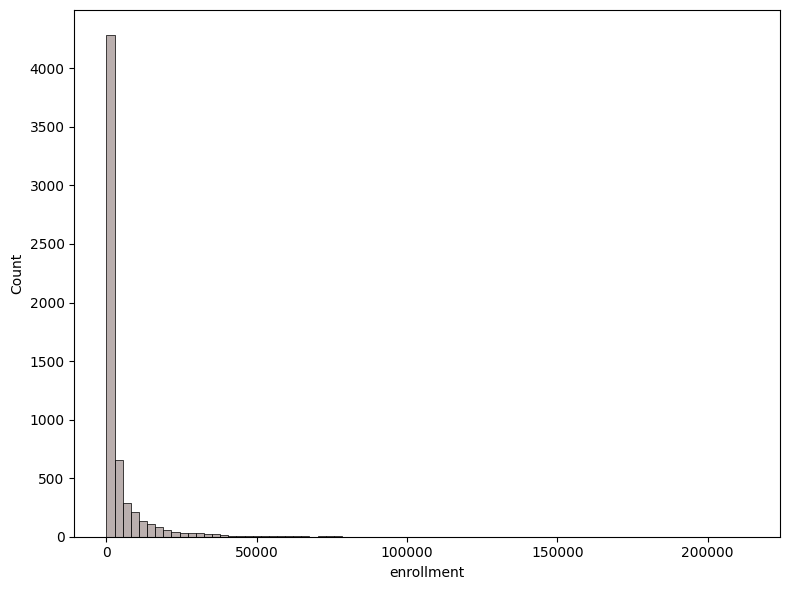

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=data, x='enrollment', bins='sqrt', color='#a39493', ax=ax)

plt.tight_layout()
plt.show()

In [20]:
q1 = data['enrollment'].quantile(q=0.25)
q3 = data['enrollment'].quantile(q=0.75)
iqr = q3 - q1
min_cut = q1 - 1.5 * iqr
max_cut = q3 + 1.5 * iqr
print(min_cut, max_cut)

-4900.5 8655.5


In [21]:
sig = data['enrollment'].std()
mu = data['enrollment'].mean()

min_cut = mu - 3 * sig
max_cut = mu + 3 * sig

print(min_cut, max_cut)

-26512.075032371282 34978.11906786257


In [22]:
data=data.loc[(data['enrollment']>500) & (data['enrollment']<=35000), :]

592.5689655172414


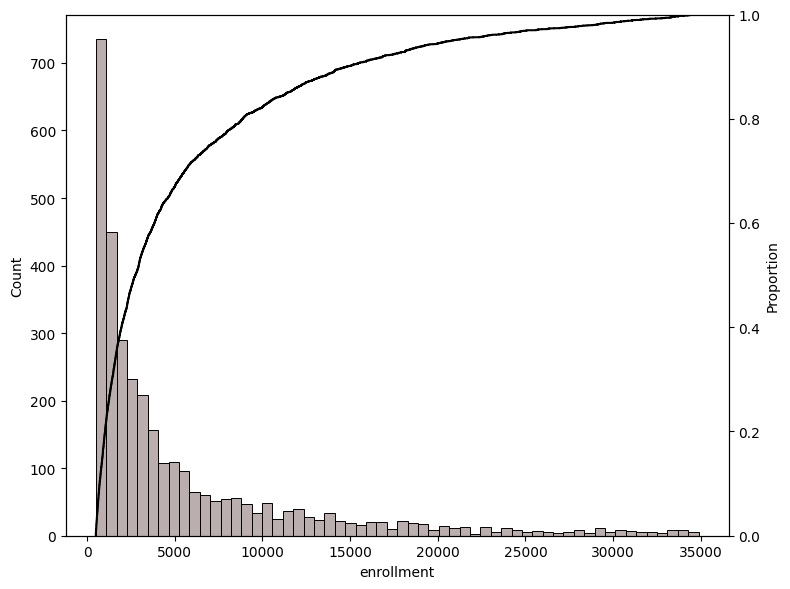

In [33]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=data, x='enrollment', bins='sqrt', color='#a39493', ax=ax)

ax2 = ax.twinx()

sns.ecdfplot(data=data, x='enrollment', color='black', ax=ax2)

# access utilized bin width
# print(ax.patches[0].get_width())

plt.tight_layout()
plt.show()

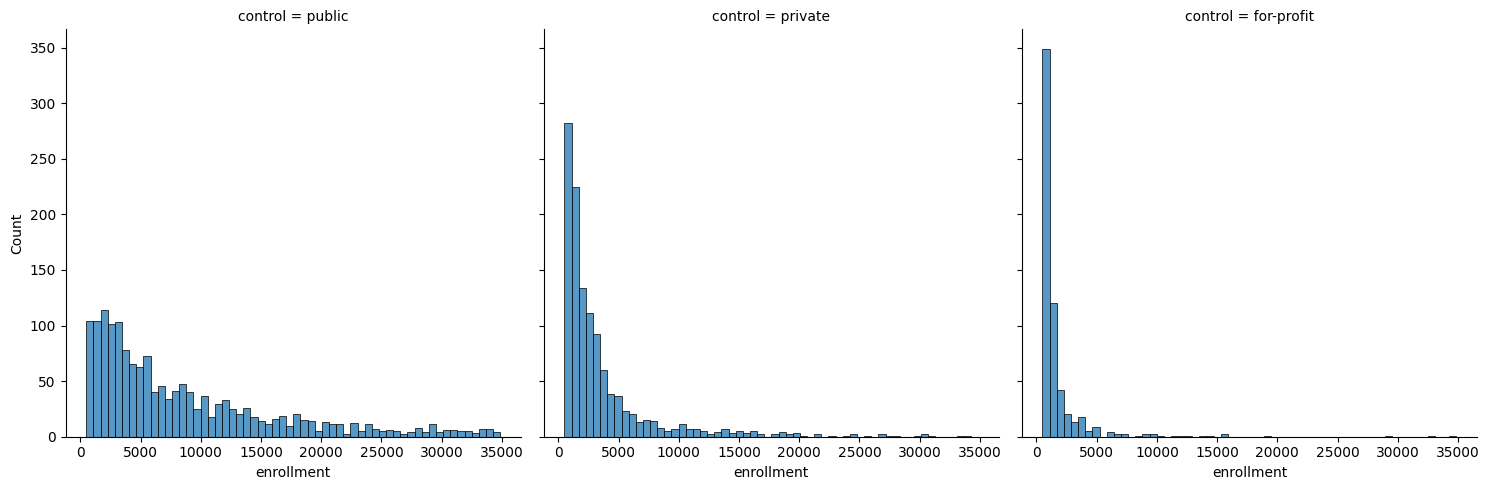

In [27]:
sns.displot(data=data, x='enrollment', bins='sqrt', kind='hist', col='control')
plt.show()

In [28]:
colo = data.loc[data['state']=='CO', :].copy()

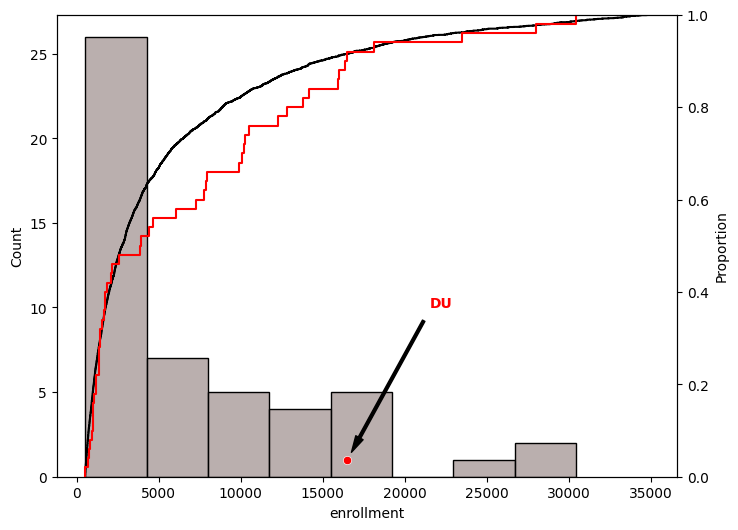

In [15]:
du_enr = colo.loc[colo['school'] == 'University of Denver', 'enrollment']

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=colo, x='enrollment', bins='sqrt', color='#a39493', ax=ax)

ax2 = ax.twinx()

sns.scatterplot(x=du_enr, y=1, 
                color='red', ax=ax)

ax.annotate('DU', 
            xy=(du_enr, 1),
            xytext=(du_enr+5000, 10),
            xycoords='data',
            fontweight = 'bold',
            color='red',
            arrowprops={'facecolor': 'black',
                        'width': 2,
                        'headwidth': 6,
                        'shrink': 0.05}
           )

sns.ecdfplot(data=data, x='enrollment', color='black', ax=ax2)
sns.ecdfplot(data=colo, x='enrollment', color='red', ax=ax2)

plt.show()

#### Marginal Rugplot Option

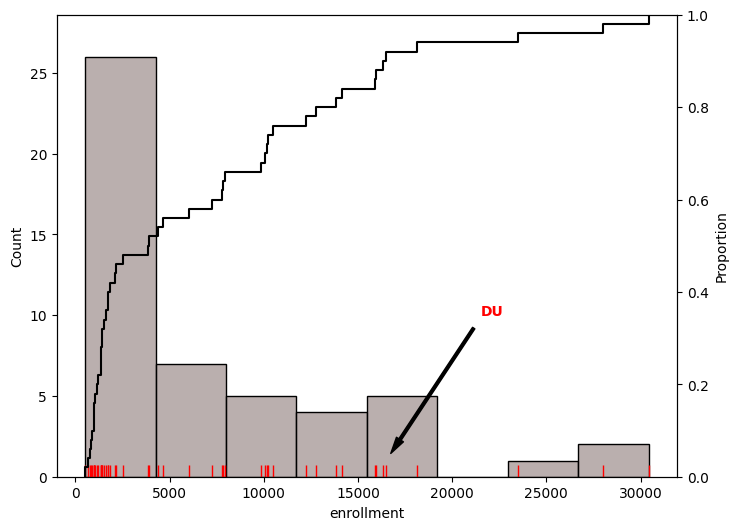

In [16]:
du_enr = colo.loc[colo['school'] == 'University of Denver', 'enrollment']

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=colo, x='enrollment', bins='sqrt', color='#a39493', ax=ax)
sns.rugplot(data=colo, x='enrollment', color='red', ax=ax)

ax2 = ax.twinx()

ax.annotate('DU', 
            xy=(du_enr, 1),
            xytext=(du_enr+5000, 10),
            xycoords='data',
            fontweight = 'bold',
            color='red',
            arrowprops={'facecolor': 'black',
                        'width': 2,
                        'headwidth': 6,
                        'shrink': 0.05}
           )

sns.ecdfplot(data=colo, x='enrollment', color='black', ax=ax2)

plt.show()

#### Marginal Rugplot with Hue

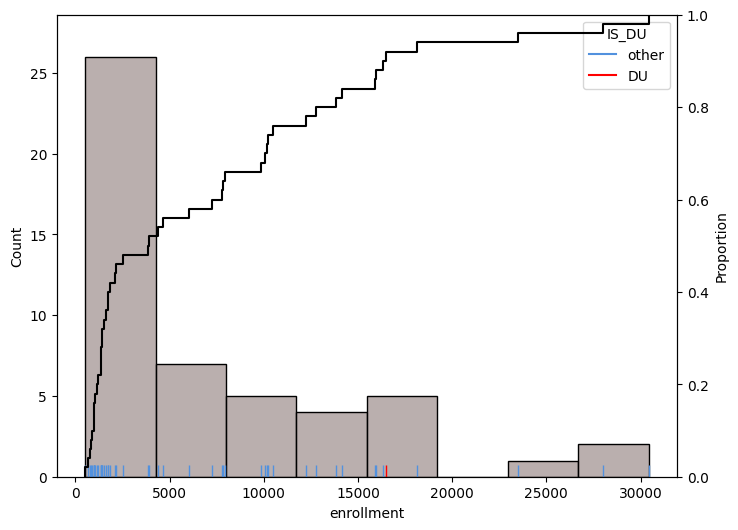

In [31]:
du_enr = colo.loc[colo['school'] == 'University of Denver', 'enrollment']
colo['IS_DU'] = np.vectorize(lambda x: 'DU' if x == 'University of Denver' else 'other')(colo['school'])

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=colo, x='enrollment', bins='sqrt', color='#a39493', ax=ax)
sns.rugplot(data=colo, x='enrollment', palette= ['#5291de', 'red'], hue='IS_DU', ax=ax, legend=True)


ax2 = ax.twinx()

sns.ecdfplot(data=colo, x='enrollment', color='black', ax=ax2)

plt.show()

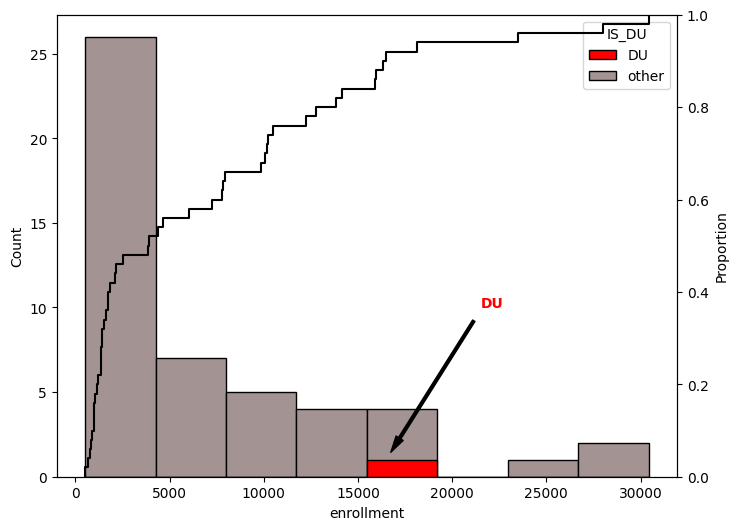

In [18]:
du_enr = colo.loc[colo['school'] == 'University of Denver', 'enrollment']
colo['IS_DU'] = np.vectorize(lambda x: 'DU' if x == 'University of Denver' else 'other')(colo['school'])

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=colo, x='enrollment', bins='sqrt', 
             hue='IS_DU', palette=['red', '#a39493'], hue_order=['DU', 'other'],
             alpha=1,
             ax=ax)

ax2 = ax.twinx()

ax.annotate('DU', 
            xy=(du_enr, 1),
            xytext=(du_enr+5000, 10),
            xycoords='data',
            fontweight = 'bold',
            color='red',
            arrowprops={'facecolor': 'black',
                        'width': 2,
                        'headwidth': 6,
                        'shrink': 0.05}
           )

sns.ecdfplot(data=colo, x='enrollment', color='black', ax=ax2)

plt.show()

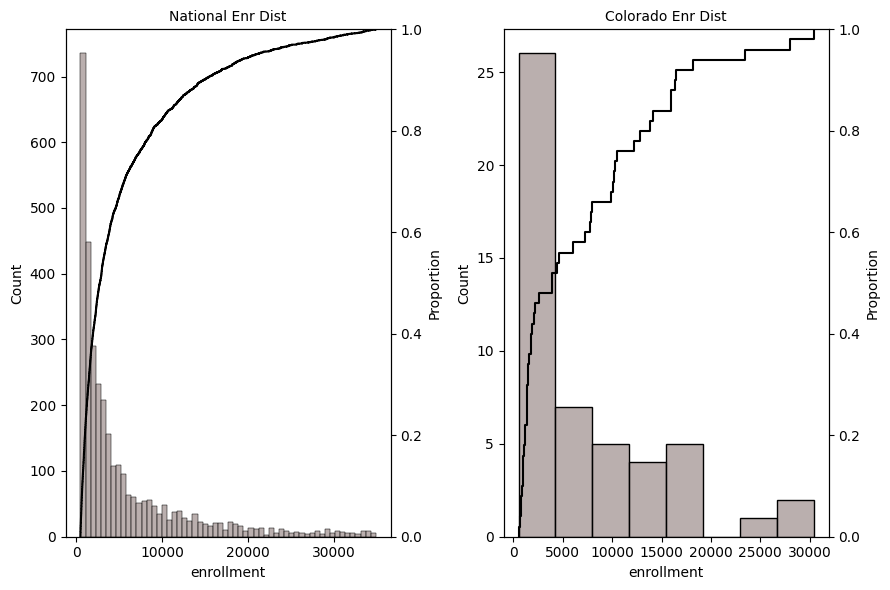

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(9,6))

sns.histplot(data=data, x='enrollment', bins='sqrt', color='#a39493', ax=axs[0])

ax2 = axs[0].twinx()

sns.ecdfplot(data=data, x='enrollment', color='black', ax=ax2)
ax2.set_title('National Enr Dist', fontsize=10)

sns.histplot(data=colo, x='enrollment', bins='sqrt', color='#a39493', ax=axs[1])

ax3 = axs[1].twinx()

sns.ecdfplot(data=colo, x='enrollment', color='black', ax=ax3)

ax3.set_title('Colorado Enr Dist', fontsize=10)

plt.tight_layout()
plt.show()